# Demo 04 - Pandas, Data Tables, and Tidy Data

In this demo we will go over some of the basics of Pandas, so that you have examples of the basic functionality for reference. We then move into working with those data tables, a deep dive on the GroupBy command and how it works, and finish with another deep dive on Melting data and the concepts of Tidy Data.

In [1]:
# clone the course repository, change to right directory, and import libraries.
%cd /content
!git clone https://github.com/nmattei/cmps3160.git
%cd /content/cmps3160/_demos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
# Make the fonts a little bigger in our graphs.
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['pdf.fonttype'] = 42

/content
Cloning into 'cmps3160'...
remote: Enumerating objects: 2053, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 2053 (delta 146), reused 126 (delta 103), pack-reused 1837 (from 2)
Receiving objects: 100% (2053/2053), 52.34 MiB | 11.19 MiB/s, done.
Resolving deltas: 100% (1197/1197), done.
Updating files: 100% (158/158), done.
/content/cmps3160/_demos


## Basic Pandas Functionality

### Creating Tables

First, let's take a look at some basic Pandas functionality. These are small examples to show the ideas of creating, selecting from, and working with data tables.

In [2]:
s1 = pd.DataFrame([0.3, 0.8, 0.1, 4.0, 1.2],
                  index = ['a', 'c', 'd', 'e', 'f'],
                  columns=['data'])

display(s1)

,data
a,0.3
c,0.8
d,0.1
e,4.0
f,1.2


In [3]:
s2 = pd.DataFrame([0.9, 0.1, 4.8, 0.3],
                  index = ['b', 'c', 'd', 'g'],
                  columns=['data'])
display(s2)

,data
b,0.9
c,0.1
d,4.8
g,0.3


Re-index can get used to do some funky things or make bigger frames.. this is not common usage but you use reindex to make new entries in an already existing table.  [Doc Page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reindex.html)

```Places NA/NaN in locations having no value in the previous index. A new object is produced unless the new index is equivalent to the current one and copy=False.```

In [4]:
# We can use re-index to fill in some gaps if we want..
import string

display(s1.reindex(list(string.ascii_lowercase)[:10]))

# We can also use the 'ffill' method to fill the missing data with the closest data.
display(s1.reindex(list(string.ascii_lowercase)[:10], method='ffill'))

,data
a,0.3
b,NaN
c,0.8
d,0.1
e,4.0
f,1.2
g,NaN
h,NaN
i,NaN
j,NaN


,data
a,0.3
b,0.3
c,0.8
d,0.1
e,4.0
f,1.2
g,1.2
h,1.2
i,1.2
j,1.2


Note that the above operation did not happen in place! so that our s1 table is preserved!

In [5]:
display(s1)

,data
a,0.3
c,0.8
d,0.1
e,4.0
f,1.2


### Filtering, Selecting, and Setting Data.

The first question we might have is how do we get at data in our dataframe? The easiest way is to get a location by it's `index` or `label`. To do this we use the `.loc` command. We can use this command to slice by the index as well!

For more on the difference between loc and iloc see the [10 Mins to Pandas](https://pandas.pydata.org/docs/user_guide/10min.html) documentation.

In [6]:
# Selection by location or loc

s1.loc['f']

,f
data,1.2


In [7]:
s1.loc['a':'d']

,data
a,0.3
c,0.8
d,0.1


In [8]:
s2.loc['b']

,b
data,0.9


We can also use the `iloc` command to get a row by it's **interger position**.

In [9]:
# Selection by position, iloc
s2.iloc[0]

,b
data,0.9


In [10]:
display(s1.iloc[0:3])

,data
a,0.3
c,0.8
d,0.1


**Gotcha Warning!** Note that loc is inclusive while iloc is not inclusive at the end of the range -- just like indexing into an array!

In [11]:
display(s1)
display(s1.iloc[1:4])


,data
a,0.3
c,0.8
d,0.1
e,4.0
f,1.2


,data
c,0.8
d,0.1
e,4.0


We can use set data in a data frame by using the `at` and `iat` commands.

In [12]:
display(s1)
s1.at['a','data'] = 0
display(s1)

,data
a,0.3
c,0.8
d,0.1
e,4.0
f,1.2


,data
a,0.0
c,0.8
d,0.1
e,4.0
f,1.2


In [13]:
display(s1)
s1.iat[2,0] = 0
display(s1)

,data
a,0.0
c,0.8
d,0.1
e,4.0
f,1.2


,data
a,0.0
c,0.8
d,0.0
e,4.0
f,1.2


Note that both of the above operations happened inplace!! **Why?**

In [14]:
# Let's reset our data frames since we messed them up!

s1 = pd.DataFrame([0.3, 0.8, 0.1, 4.0, 1.2],
                  index = ['a', 'c', 'd', 'e', 'f'],
                  columns=['data'])

s2 = pd.DataFrame([0.9, 0.1, 4.8, 0.3],
                  index = ['b', 'c', 'd', 'g'],
                  columns=['data'])

In [15]:
# Recall we can also use aggregation operators over the columns

s2['data'].sum()

6.1

As we have seen we can use boolean operations to filter and select data. Recall that these operations return a **view** of the data and not a copy of the dataframe.

In [16]:
s2[s2['data'] > 3]

,data
d,4.8


In [17]:
s1[ (s1['data'] < 1.0) & (s1['data'] > 3.0) ]

,data


In [18]:
s1

,data
a,0.3
c,0.8
d,0.1
e,4.0
f,1.2


### Operations on Data Tables - Broadcasting

When we add constants to a table we get something called **broadcasting** where the operation happens to every element of a table (or column!) You can read more about this essential basic functionality at the [Pandas Documentation Website](https://pandas.pydata.org/docs/user_guide/basics.html)

In [19]:
s1 + 0.5

,data
a,0.8
c,1.3
d,0.6
e,4.5
f,1.7


In [20]:
s2

,data
b,0.9
c,0.1
d,4.8
g,0.3


Note that the above operations did not happen **inplace** so that our tables remain the same as when we declared them! When you manipulate a datatable you must always tell pandas to either save that as a new variable or table, or to do the operation in place.

**Question:** What happens if we add two tables together?

In [21]:
# Note again that these operations did not happen in place!
display(s1)
display(s2)

,data
a,0.3
c,0.8
d,0.1
e,4.0
f,1.2


,data
b,0.9
c,0.1
d,4.8
g,0.3


In [22]:
s1 + s2

,data
a,NaN
b,NaN
c,0.9
d,4.9
e,NaN
f,NaN
g,NaN


In [23]:
s1 - s2

,data
a,NaN
b,NaN
c,0.7
d,-4.7
e,NaN
f,NaN
g,NaN


Note that + is like what we'll learn is an inner join soon but it also adds the numbers together!

You can also apply functions across and down and with lambdas...

In [24]:
frame = pd.DataFrame(np.random.randn(4,3), columns=list('abc'),
                 index=['Utah', 'Ohio', 'Texas','Oregon'])
display(frame)

,a,b,c
Utah,0.866813,-0.482888,-1.531895
Ohio,-1.293345,-0.524635,0.092538
Texas,0.681078,1.595989,-1.921015
Oregon,0.087871,-1.567201,0.495995


In [25]:
frame.abs()

,a,b,c
Utah,0.866813,0.482888,1.531895
Ohio,1.293345,0.524635,0.092538
Texas,0.681078,1.595989,1.921015
Oregon,0.087871,1.567201,0.495995


In [26]:
minmax = lambda x: x.max() - x.min()

frame.apply(minmax)

,0
a,2.160158
b,3.163191
c,2.417009


In [27]:
# Default is axis=0 or per column, can also do per row!
frame.apply(minmax, axis=1)


,0
Utah,2.398708
Ohio,1.385883
Texas,3.517004
Oregon,2.063196


### Operations on Data Tables - Ranking

Some of the [Pandas Rank](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rank.html) commands aren't totally obvious...

In [28]:
frame = pd.DataFrame({'a':[0, 1, 0, 1],
                      'b':[4.3, 7, -3, 2],
                   'c':[-2, 5, 8, -2.5]})
display(frame)

,a,b,c
0,0,4.3,-2.0
1,1,7.0,5.0
2,0,-3.0,8.0
3,1,2.0,-2.5


In [29]:
# Default is average but you can do other things!

display(frame.rank(ascending=False))

display(frame.rank(ascending=False, method='first'))

,a,b,c
0,3.5,2.0,3.0
1,1.5,1.0,2.0
2,3.5,4.0,1.0
3,1.5,3.0,4.0


,a,b,c
0,3.0,2.0,3.0
1,1.0,1.0,2.0
2,4.0,4.0,1.0
3,2.0,3.0,4.0


In [30]:
# Can also sort along rows!

frame.rank(axis=1)

,a,b,c
0,2.0,3.0,1.0
1,1.0,3.0,2.0
2,2.0,1.0,3.0
3,2.0,3.0,1.0


### Using Hierarchical Indices

To set a **hierarchical index** one can refer to the [documetnation page](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html).

In [31]:
# Setting a heiararichal index -- The bad way would be to build up tuples as an index.

index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)

In [33]:
display(pop)

,0
"(California, 2000)",33871648
"(California, 2010)",37253956
"(New York, 2000)",18976457
"(New York, 2010)",19378102
"(Texas, 2000)",20851820
"(Texas, 2010)",25145561


In [ ]:
# Now we can still get slices etc. in a strightforward way.
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [ ]:
# But if we want to get all 2010 data we have to do something like...
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

In [ ]:
#We can make the data frame as (note it is tidy!)
df = pd.DataFrame([('California', 2000, 33871648),
                   ('California', 2010, 37253956),
                   ('New York', 2000, 18976457),
                   ('New York', 2010, 19378102),
                   ('Texas', 2000, 20851820),
                   ('Texas', 2010, 25145561)],
                  columns=['state', 'year', 'pop'])
df

,state,year,pop
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [ ]:
df.set_index(['state', 'year'], inplace=True)
df

pop
state      year          
California 2000  33871648
           2010  37253956
New York   2000  18976457
           2010  19378102
Texas      2000  20851820
           2010  25145561

In [ ]:
# And now we can do cool stuff slicing, but it gets compicated with tuples.
df.loc[('California')]

,pop
year,
2000,33871648
2010,37253956


In [ ]:
df.index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           names=['state', 'year'])

The [df.xs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.xs.html) command can help with slicing multi-indicies.

In [ ]:
# Thought this can get a bit complicated... xs = cross-section
df.xs(2010, level=1)

,pop
state,
California,37253956
New York,19378102
Texas,25145561


In [37]:
index = pd.MultiIndex.from_tuples(
    [("California", 2000), ("California", 2010),
     ("New York", 2000), ("New York", 2010),
     ("Texas", 2000), ("Texas", 2010)],
    names=["State", "Year"]
)

data = [33871648, 37253956, 18976457, 19378102, 20851820, 25145561]
df = pd.DataFrame(data, index=index, columns=["Population"])


In [38]:
# specific state and year
df.loc[("California", 2000)]


,California
,2000
Population,33871648


In [39]:
# Selecting all years for a state

df.loc["California"]

,Population
Year,
2000,33871648
2010,37253956


In [40]:
# all states for a given year
df.xs(2000, level="Year")

,Population
State,
California,33871648
New York,18976457
Texas,20851820


In [41]:
# all years for California
df.xs("California", level="State")

,Population
Year,
2000,33871648
2010,37253956


In [42]:
# all 2000 data
df.xs(2000, level="Year")

,Population
State,
California,33871648
New York,18976457
Texas,20851820


### Importance of using np.nan

Note that we have to import numpy.nan but once we do we can use the groupby and other methods without having to worry about what to do with missing data.

For the example below, what happens when we don't use NaNs in the data table?

In [43]:
# Make a data frame from a lists
# Try replacing 'XX' with various values..

df = pd.DataFrame({'age':     [12.2, 11.0, 15.6, '--'],
                  'wgt_kg':   [42.3, 40.8, 65.3, 84.2],
                  'hgt_cm':   [145.1, 143.8, 165.3, 185.8],
                  'sex':      ['male', 'female', 'male', 'male'],
                  'country': ['USA', 'AUS', 'EU', 'USA']})
df

,age,wgt_kg,hgt_cm,sex,country
0,12.2,42.3,145.1,male,USA
1,11.0,40.8,143.8,female,AUS
2,15.6,65.3,165.3,male,EU
3,--,84.2,185.8,male,USA


In [44]:
df['age'].describe()

,age
count,4.0
unique,4.0
top,12.2
freq,1.0


In [45]:
# Note the type that has been imputed here...
df.dtypes

,0
age,object
wgt_kg,float64
hgt_cm,float64
sex,object
country,object


In [46]:
df['age'].sum()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [47]:
# Need to make sure it's set as number!

df["age"] = pd.to_numeric(df["age"])


ValueError: Unable to parse string "--" at position 3

In [ ]:
# But first we have to make sure it's a NAN!!
display(df["age"].replace("--", np.nan))

df["age"].replace("--", np.nan,inplace=True)

0    12.2
1    11.0
2    15.6
3     NaN
Name: age, dtype: float64

In [ ]:
df.dtypes

age        float64
wgt_kg     float64
hgt_cm     float64
sex         object
country     object
dtype: object

In [ ]:
df["age"].sum()

38.8

## The Groupby Command

Below we see what happens in Pandas when we use the groupby command.

In [ ]:
df = pd.DataFrame({'age':     [12.2, 11.0, 15.6, 35.1],
                  'wgt_kg':   [42.3, 40.8, 65.3, 84.2],
                  'hgt_cm':   [145.1, 143.8, 165.3, 185.8],
                  'sex':      ['male', 'female', 'male', 'male'],
                  'country': ['USA', 'AUS', 'EU', 'USA']})
df

,age,wgt_kg,hgt_cm,sex,country
0,12.2,42.3,145.1,male,USA
1,11.0,40.8,143.8,female,AUS
2,15.6,65.3,165.3,male,EU
3,35.1,84.2,185.8,male,USA


In [ ]:
# This is a little weird, recall that we have lazy evaluation!

df.groupby(['sex'])

In [ ]:
# If we describe it then we can force python to not be lazy!

df.groupby('sex').describe()

age                                                      wgt_kg  \
       count       mean        std   min   25%   50%    75%   max  count   
sex                                                                        
female   1.0  11.000000        NaN  11.0  11.0  11.0  11.00  11.0    1.0   
male     3.0  20.966667  12.357319  12.2  13.9  15.6  25.35  35.1    3.0   

                   ...              hgt_cm                                  \
             mean  ...    75%   max  count   mean        std    min    25%   
sex                ...                                                       
female  40.800000  ...  40.80  40.8    1.0  143.8        NaN  143.8  143.8   
male    63.933333  ...  74.75  84.2    3.0  165.4  20.350184  145.1  155.2   

                              
          50%     75%    max  
sex                           
female  143.8  143.80  143.8  
male    165.3  175.55  185.8  

[2 rows x 24 columns]

In [ ]:
# We can pass operators to groupby to get better results.
df.groupby(['sex']).mean(numeric_only = True)

<ipython-input-120-24cd508f0905>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['sex']).mean()


,age,wgt_kg,hgt_cm
sex,,,
female,11.000000,40.800000,143.8
male,20.966667,63.933333,165.4


In [ ]:
# Can also group by multiple columns
df.groupby(['sex', 'country']).describe()


age                                                       \
               count   mean        std   min     25%    50%     75%   max   
sex    country                                                              
female AUS       1.0  11.00        NaN  11.0  11.000  11.00  11.000  11.0   
male   EU        1.0  15.60        NaN  15.6  15.600  15.60  15.600  15.6   
       USA       2.0  23.65  16.192745  12.2  17.925  23.65  29.375  35.1   

               wgt_kg         ...               hgt_cm                     \
                count   mean  ...     75%   max  count    mean        std   
sex    country                ...                                           
female AUS        1.0  40.80  ...  40.800  40.8    1.0  143.80        NaN   
male   EU         1.0  65.30  ...  65.300  65.3    1.0  165.30        NaN   
       USA        2.0  63.25  ...  73.725  84.2    2.0  165.45  28.779246   

                                                        
                  min      25%     50%      75%    max  
sex    country                                          
female AUS      143.8  143.800  143.80  143.800  143.8  
male   EU       165.3  165.300  165.30  165.300  165.3  
       USA      145.1  155.275  165.45  175.625  185.8  

[3 rows x 24 columns]

In [ ]:
# Multi-Index!!
# We can select based on a list of indices
df.groupby(['sex', 'country']).mean().loc['female', 'AUS']

age        11.0
wgt_kg     40.8
hgt_cm    143.8
Name: (female, AUS), dtype: float64

In [ ]:
## We can also limit ourselves by just subselecting columns
display(df.groupby(["country"]).count())
display(df.groupby(["country"])[["sex"]].count())

,age,wgt_kg,hgt_cm,sex
country,,,,
AUS,1,1,1,1
EU,1,1,1,1
USA,2,2,2,2


,sex
country,
AUS,1
EU,1
USA,2


In [ ]:
# same as...
df['country'].value_counts()

USA    2
AUS    1
EU     1
Name: country, dtype: int64

In [ ]:
# This is the same as...
grouped = df.groupby(['country'])

In [ ]:
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

To get access to a group that we made, use the [get_group() command](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.get_group.html).

We can also get access to the actual tuples and they're types that are generated by the `groupby` commands

In [ ]:
grouped.groups

{'AUS': [1], 'EU': [2], 'USA': [0, 3]}

In [ ]:
grouped.mean(numeric_only = True)

<ipython-input-128-eca914d15133>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped.mean()


,age,wgt_kg,hgt_cm
country,,,
AUS,11.00,40.80,143.80
EU,15.60,65.30,165.30
USA,23.65,63.25,165.45


In [ ]:
grouped.get_group('AUS')

,age,wgt_kg,hgt_cm,sex,country
1,11.0,40.8,143.8,female,AUS


In [ ]:
# Or do it fancy?
[display(grouped.get_group(i)) for i in grouped.groups]

,age,wgt_kg,hgt_cm,sex,country
1,11.0,40.8,143.8,female,AUS


,age,wgt_kg,hgt_cm,sex,country
2,15.6,65.3,165.3,male,EU


,age,wgt_kg,hgt_cm,sex,country
0,12.2,42.3,145.1,male,USA
3,35.1,84.2,185.8,male,USA


[None, None, None]

### A Big Deep Dive on Groupby!

**Question** If we were going to implement Groupby, how would you do it?

The first thing we can note is that if we iterate over the groups, it makes it clear what Pandas and Python are doing.

However we don't want to iterate ourselves as this will generally be slow and error prone!

**We always want to replace for loops in Pandas** since Pandas functions are highly optimized (numpy + C + vectorization)

In [ ]:
grouped = df.groupby(['country'])
grouped.groups

{'AUS': [1], 'EU': [2], 'USA': [0, 3]}

In [ ]:
for group_index, groupi in grouped:
  print(group_index)
  display(groupi)
  print(groupi['age'].mean())

AUS


<ipython-input-132-e9e9893737c2>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group_index, groupi in grouped:


,age,wgt_kg,hgt_cm,sex,country
1,11.0,40.8,143.8,female,AUS


11.0
EU


,age,wgt_kg,hgt_cm,sex,country
2,15.6,65.3,165.3,male,EU


15.6
USA


,age,wgt_kg,hgt_cm,sex,country
0,12.2,42.3,145.1,male,USA
3,35.1,84.2,185.8,male,USA


23.65


In [ ]:
df.groupby('country')['age'].mean()

country
AUS    11.00
EU     15.60
USA    23.65
Name: age, dtype: float64

### Split-Apply-Combine

The `groupby` operation can be understood as a Split-Apply-Combine pattern:

<img src="https://jakevdp.github.io/figures/split-apply-combine.svg" width=600/>

How could we implement this?

In [ ]:
dfi = pd.DataFrame([
    {'key': 'A', 'data': 1}, {'key': 'B', 'data': 2},
    {'key': 'C', 'data': 3}, {'key': 'A', 'data': 4},
    {'key': 'B', 'data': 5}, {'key': 'C', 'data': 6},
  ]
)
dfi

,key,data
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


In [ ]:
dfi.groupby('key').sum()

,data
key,
A,5
B,7
C,9


In [ ]:
# Option 1: Boolean Masks
def group_by_masks(dfi):
  result = []
  for key in ['A','B', 'C']:
    result.append({
        'key': key,
        'data': dfi[dfi['key']==key]['data'].sum()
    })
  return pd.DataFrame(result)

group_by_masks(dfi)

,key,data
0,A,5
1,B,7
2,C,9


What is the Big Oh runtime of this implementation?

Can we improve?

In [ ]:
# Option 2: Build a dict from key->sum in a single pass through data.
from collections import defaultdict
def group_by_dict(dfi):
  sums = {}
  for index, row in dfi.iterrows():
    sums[row['key']] = sums.get(row['key'], 0) + row['data']
  # display(sums)
  return pd.DataFrame.from_dict(sums, orient='index', columns=['data'])
  return sums
group_by_dict(dfi)

,data
A,5
B,7
C,9


### Lazy evaluation

- `groupby` doesn't actually do much until you do something with the groups.

In [ ]:
# make a big DataFrame.
bigdfi = dfi.sample(100000, replace=True)

In [ ]:
bigdfi

,key,data
0,A,1
1,B,2
3,A,4
4,B,5
4,B,5
...,...,...
0,A,1
0,A,1
2,C,3
1,B,2


In [ ]:
# call groupby, but don't do anything with it.
%timeit bigdfi.groupby('key')

28.4 µs ± 1.12 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
# once you use the groups, it takes a lot more time.
%timeit bigdfi.groupby('key').sum()

9.35 ms ± 2.6 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# for comparison, this is the time to just sum the data column.
%timeit bigdfi['data'].sum()

The slowest run took 4.63 times longer than the fastest. This could mean that an intermediate result is being cached.
396 µs ± 224 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
# Pandas uses Cython internally, which implements core python functions
# # in highly optimized C code.
# This is one reason why our implementation is horribly slow.
%timeit group_by_dict(bigdfi)

5.33 s ± 539 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# our mask implementation relies on pandas functions, so it is fast,
# even though the asymptotic runtime should be larger than group_by_dict!
%timeit group_by_masks(bigdfi)

29.1 ms ± 838 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# Pandas builds on numpy
# See: "Why is numpy fast?" https://numpy.org/doc/stable/user/whatisnumpy.html
import numpy as np
a = np.random.rand(100000)
b = np.random.rand(100000)

In [ ]:
def dot_product_slow(a,b):
  dot = 0
  for i in range(len(a)):
    dot += a[i] * b[i]
  return dot

%timeit dot_product_slow(a,b)

35.6 ms ± 3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit np.dot(a,b)

55 µs ± 5.74 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Futher reading on optimization:
- [Locality of reference](https://en.wikipedia.org/wiki/Locality_of_reference)
- [Vectorization](https://en.wikipedia.org/wiki/Automatic_vectorization)
- [Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)

## Melting and Tidy Data

In this part of the demo we will duplicate the slides and get some practice with the Melt command to make a data table tidy where it wasn't before!

In [ ]:
df = pd.read_csv('./data/religon.csv')
df

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


The [melt command](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html) does...

```
DataFrame.melt(id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True)

Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.

This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.
```

So here we want to take the above data frame and make it `grow down` by converting income into a categorical variable.

In [ ]:
f_df = pd.melt(df,
               ["religion"],
               var_name="income",
               value_name="freq")
f_df = f_df.sort_values(by=["income"])
f_df.head(10)

,religion,income,freq
14,Dont know/refused,$10-20k,14
15,Evangelical Prot,$10-20k,869
18,Jehovahs Witness,$10-20k,27
13,Catholic,$10-20k,617
12,Buddhist,$10-20k,21
11,Atheist,$10-20k,27
10,Agnostic,$10-20k,34
19,Jewish,$10-20k,19
17,Historically Black Prot,$10-20k,244
16,Hindu,$10-20k,9


In [ ]:
# We can now use more simple slicing to see the things we need.

f_df[(f_df['religion'] == 'Atheist')].sort_values(by='income')

,religion,income,freq
11,Atheist,$10-20k,27
41,Atheist,$40-50k,35
1,Atheist,<$10k,12
21,Atheist,$20-30k,37
31,Atheist,$30-40k,52
51,Atheist,$50-75k,70


In [ ]:
f_df[(f_df['income'] == '$50-75k')].sort_values(by='freq', ascending=False)

,religion,income,freq
55,Evangelical Prot,$50-75k,1486
53,Catholic,$50-75k,1116
57,Historically Black Prot,$50-75k,223
50,Agnostic,$50-75k,137
59,Jewish,$50-75k,95
51,Atheist,$50-75k,70
52,Buddhist,$50-75k,58
54,Dont know/refused,$50-75k,35
56,Hindu,$50-75k,34
58,Jehovahs Witness,$50-75k,30


### An Over The Top Example

In this example we really walk through all the nitty gritty of taking the Billboard data and melting it down, fixing some errors in the table, and getting a dataframe that we can do easier manipulation on.

In [ ]:
b_df = pd.read_csv("./data/billboard.csv")
b_df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This thing is a mess!! What if want to say, graph the positions of a song for a given artist? Then how would we do it?

Again, we are going to melt to make the table `grow down` by keeping the `id_vars` and then melting the rows based on week position to be values.



In [ ]:
# Keep identifier variables
id_vars = ["year",
           "artist.inverted",
           "track",
           "time",
           "genre",
           "date.entered",
           "date.peaked"]

# Melt the rest into week and rank columns
b_df = pd.melt(frame=b_df,
             id_vars=id_vars,
             var_name="week",
             value_name="rank")


In [ ]:
display(b_df.head(20))
b_df.dtypes

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,x1st.week,59.0
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,x1st.week,83.0
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,x1st.week,63.0
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,x1st.week,77.0
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,x1st.week,81.0


year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
week                object
rank               float64
dtype: object

In [ ]:
# Let's fix the week thing, it's not good...
b_df["week"] = b_df['week'].str.extract('(\d+)', expand=False).astype(int)

In [ ]:
b_df[:5]

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0


In [ ]:
b_df["week"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76])

There's a subtle problem here, rank is an int but some are NAN's and we can't have [int-nan's...](https://pandas.pydata.org/pandas-docs/version/0.24/whatsnew/v0.24.0.html#optional-integer-na-support)

In [ ]:
# Why not ints? Gotcha! ?!?!?
b_df["rank"] = b_df["rank"].astype(float)

display(b_df.head(20))

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,1,59.0
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,1,83.0
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,1,63.0
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,1,77.0
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,1,81.0


In [ ]:
# We can see if anything is missing...
# Remember axis=1 goes row wise..so we are saying show us any row with missing values...
b_df[b_df.isnull().any(axis=1)]

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
588,2000,"Estefan, Gloria",No Me Dejes De Querer,3:25,Rock,2000-06-10,2000-06-10,2,NaN
618,2000,Anastacia,I'm Outta Love,4:01,Pop,2000-04-01,2000-04-01,2,NaN
628,2000,Master P,Souljas,3:33,Rap,2000-11-18,2000-11-18,2,NaN
629,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,2,NaN
633,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,2,NaN
...,...,...,...,...,...,...,...,...,...
24087,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,76,NaN
24088,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,76,NaN
24089,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,76,NaN
24090,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,76,NaN


In [ ]:
# We don't need these so... let's drop them.
b_df = b_df.dropna()

We're going to use the handy [to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) which will get us a date!

In [ ]:
# Create "date" columns
#  date = (date entered chart) + (# of weeks) - (1 week) [fence post problem]
b_df['date'] = pd.to_datetime(b_df['date.entered']) + pd.to_timedelta(b_df['week'], unit='w') - pd.DateOffset(weeks=1)

In [ ]:
display(b_df[100:110])
b_df.dtypes

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank,date
100,2000,D'Angelo,Untitled (How Does It Feel),7:10,R&B,2000-01-22,2000-02-19,1,77.0,2000-01-22
101,2000,"Messina, Jo Dee",That's The Way,3:17,Country,2000-06-24,2000-08-26,1,78.0,2000-06-24
102,2000,Avant,My First Love,4:28,Rock,2000-11-04,2000-12-16,1,70.0,2000-11-04
103,2000,Son By Four,A Puro Dolor (Purest Of Pain),3:30,Latin,2000-04-08,2000-08-19,1,80.0,2000-04-08
104,2000,Da Brat,What'Chu Like,3:57,Rap,2000-06-03,2000-08-12,1,71.0,2000-06-03
105,2000,DMX,Party Up (Up In Here),3:45,Rap,2000-02-26,2000-04-22,1,88.0,2000-02-26
106,2000,"Dixie Chicks, The",Cowboy Take Me Away,4:51,Country,1999-11-27,2000-01-29,1,79.0,1999-11-27
107,2000,"McGraw, Tim",My Next Thirty Years,3:37,Country,2000-10-21,2000-12-16,1,73.0,2000-10-21
108,2000,"Tritt, Travis",Best Of Intentions,4:15,Country,2000-08-19,2000-12-02,1,97.0,2000-08-19
109,2000,Alice Deejay,Better Off Alone,6:50,Electronica,2000-04-08,2000-06-03,1,79.0,2000-04-08


year                        int64
artist.inverted            object
track                      object
time                       object
genre                      object
date.entered               object
date.peaked                object
week                        int64
rank                      float64
date               datetime64[ns]
dtype: object

In [ ]:
# Ignore now-redundant, messy columns -- same as dropping
b_df = b_df[["year",
         "artist.inverted",
         "track",
         "time",
         "genre",
         "week",
         "rank",
         "date"]]

b_df = b_df.sort_values(ascending=True, by=["year","artist.inverted","track","week","rank"])

# Keep tidy dataset for future usage
billboard = b_df

billboard.head(10)

,year,artist.inverted,track,time,genre,week,rank,date
246,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,1,87.0,2000-02-26
563,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2,82.0,2000-03-04
880,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,3,72.0,2000-03-11
1197,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,4,77.0,2000-03-18
1514,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,5,87.0,2000-03-25
1831,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,6,94.0,2000-04-01
2148,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,7,99.0,2000-04-08
287,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,1,91.0,2000-09-02
604,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,2,87.0,2000-09-09
921,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,3,92.0,2000-09-16


In [ ]:
# Now we can see the artists we have...
billboard['artist.inverted'].unique()

array(['2 Pac', '2Ge+her', '3 Doors Down', '504 Boyz', '98�', 'A*Teens',
       'Aaliyah', 'Adams, Yolanda', 'Adkins, Trace',
       'Aguilera, Christina', 'Alice Deejay', 'Allan, Gary', 'Amber',
       'Anastacia', 'Anthony, Marc', 'Avant', 'BBMak',
       'Backstreet Boys, The', 'Badu, Erkyah', 'Baha Men',
       'Barenaked Ladies', 'Beenie Man', 'Before Dark', 'Bega, Lou',
       'Big Punisher', 'Black Rob', 'Black, Clint', 'Blaque',
       'Blige, Mary J.', 'Blink-182', 'Bloodhound Gang', 'Bon Jovi',
       'Braxton, Toni', 'Brock, Chad', 'Brooks & Dunn', 'Brooks, Garth',
       'Byrd, Tracy', 'Cagle, Chris', "Cam'ron", 'Carey, Mariah',
       'Carter, Aaron', 'Carter, Torrey', 'Changing Faces',
       'Chesney, Kenny', 'Clark Family Experience', 'Clark, Terri',
       'Common', 'Counting Crows', 'Creed', 'Cyrus, Billy Ray',
       "D'Angelo", 'DMX', 'Da Brat', 'Davidson, Clay', 'De La Soul',
       "Destiny's Child", 'Diffie, Joe', 'Dion, Celine',
       'Dixie Chicks, The', 'Dr. 

In [ ]:
# Easier to visualize!!
b_df[(b_df['artist.inverted'] == 'Jay-Z')]

,year,artist.inverted,track,time,genre,week,rank,date
192,2000,Jay-Z,Anything,3:41,Rap,1,72.0,2000-02-26
509,2000,Jay-Z,Anything,3:41,Rap,2,58.0,2000-03-04
826,2000,Jay-Z,Anything,3:41,Rap,3,55.0,2000-03-11
1143,2000,Jay-Z,Anything,3:41,Rap,4,55.0,2000-03-18
1460,2000,Jay-Z,Anything,3:41,Rap,5,63.0,2000-03-25
...,...,...,...,...,...,...,...,...
5129,2000,Jay-Z,I Just Wanna Love U (Give It 2 Me),3:50,Rap,17,24.0,2001-02-17
5446,2000,Jay-Z,I Just Wanna Love U (Give It 2 Me),3:50,Rap,18,28.0,2001-02-24
5763,2000,Jay-Z,I Just Wanna Love U (Give It 2 Me),3:50,Rap,19,29.0,2001-03-03
6080,2000,Jay-Z,I Just Wanna Love U (Give It 2 Me),3:50,Rap,20,30.0,2001-03-10


<Axes: title={'center': 'Jay-Z Hits by Week'}, ylabel='Frequency'>

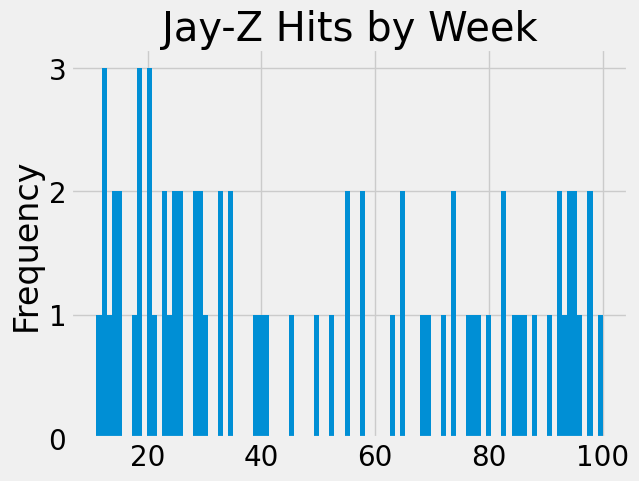

In [ ]:
b_df[(b_df['artist.inverted'] == 'Jay-Z')]['rank'].plot.hist(bins=100, title="Jay-Z Hits by Week")

<Axes: xlabel='date', ylabel='rank'>

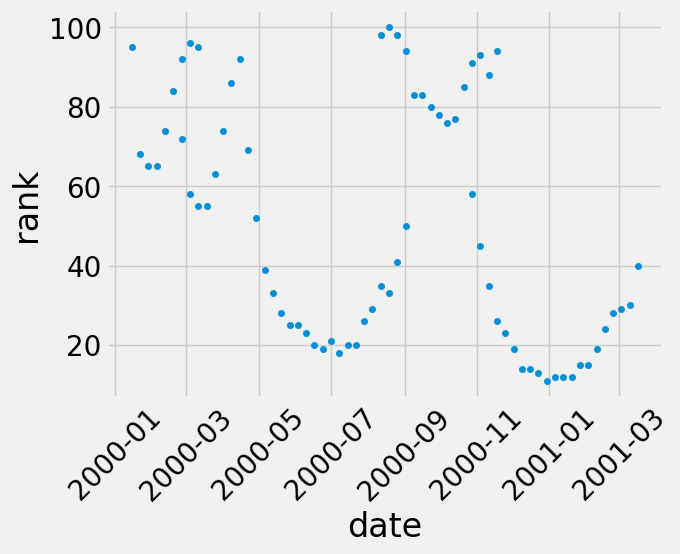

In [ ]:
#Scatterplot of JayZ at different songs/days?
b_df[(b_df['artist.inverted'] == 'Jay-Z')].plot.scatter(y='rank',
                                                        x='date',
                                                        rot=45)

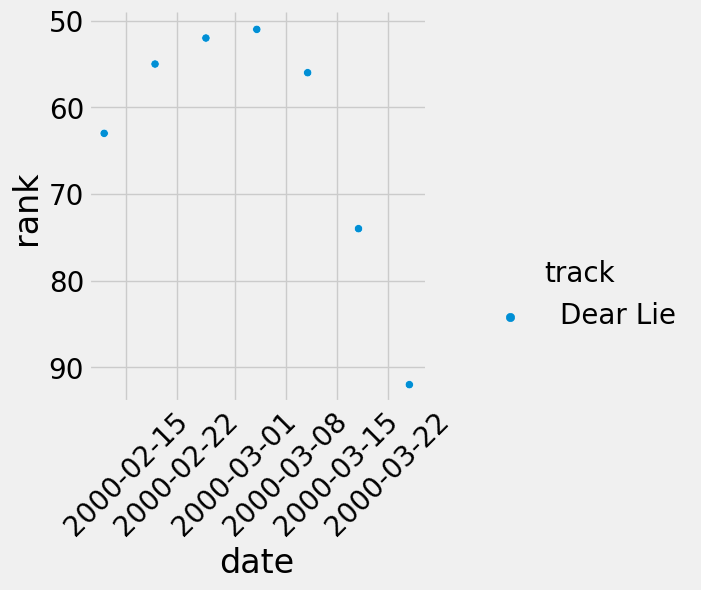

In [ ]:
g = sns.pairplot(x_vars=["date"],
             y_vars=["rank"],
             data=b_df[(b_df['artist.inverted'] == 'TLC')],
             hue="track",
             height=5)

# # Hacky rotation?? -- https://github.com/mwaskom/seaborn/issues/867
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# # Invert..
for ax in g.axes.flat:
    ax.invert_yaxis()

In [ ]:
# Or we can get the list of top ranked songs...
b_df[(b_df['rank'] == 1.0)].groupby(['artist.inverted']).count()

,year,track,time,genre,week,rank,date
artist.inverted,,,,,,,
Aaliyah,1,1,1,1,1,1,1
"Aguilera, Christina",6,6,6,6,6,6,6
"Carey, Mariah",1,1,1,1,1,1,1
Creed,1,1,1,1,1,1,1
Destiny's Child,14,14,14,14,14,14,14
"Iglesias, Enrique",3,3,3,3,3,3,3
Janet,3,3,3,3,3,3,3
Lonestar,2,2,2,2,2,2,2
Madonna,4,4,4,4,4,4,4
